## 2-1 단순회귀분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("auto-mpg.csv", header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

display(df.head())
print()

pd.set_option('display.max_columns', 10)
display(df.head())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [2]:
print(df.info())
print()

print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000  

In [3]:
print(df['horsepower'].unique())
print()

df['horsepower'].replace("?", np.nan, inplace=True)
df.dropna(subset= ['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

display(df.describe())

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
ndf = df[['mpg','cylinders','horsepower','weight']]
display(ndf.head())

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


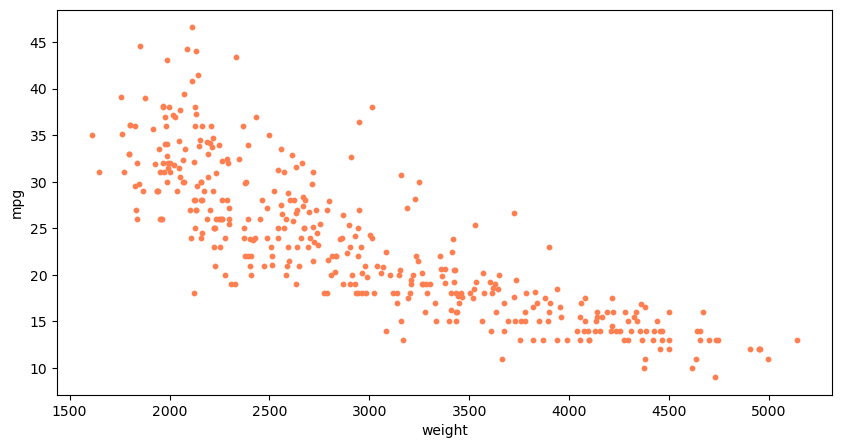

In [5]:
ndf.plot(kind = 'scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5))
plt.show()
plt.close()

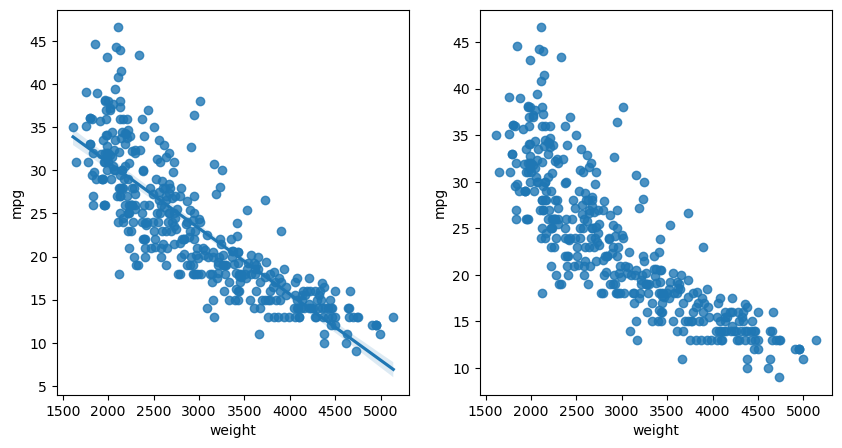

In [6]:
fig = plt.figure(figsize=(10,5))
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)
plt.show()
plt.close()

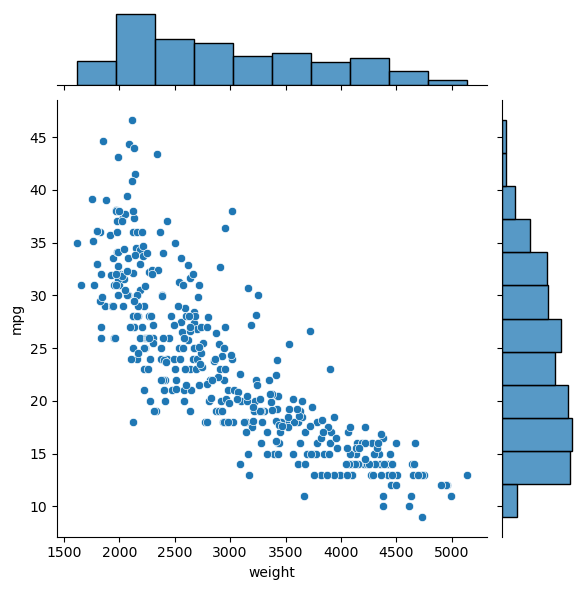

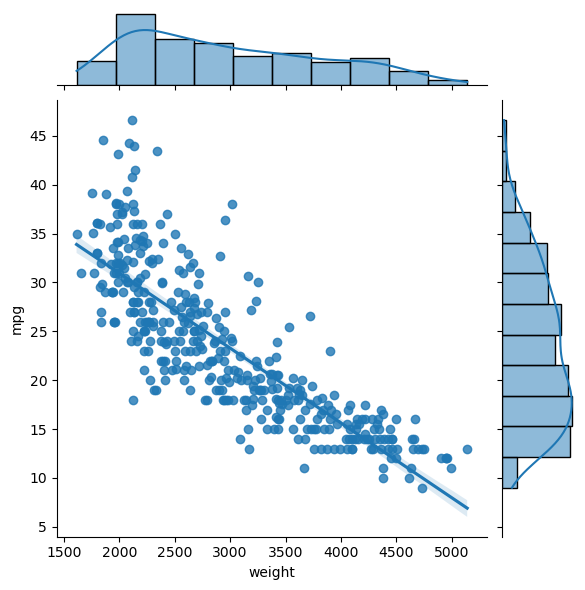

In [7]:
sns.jointplot(x='weight', y='mpg', data=ndf)
sns.jointplot(x='weight',y='mpg', kind = 'reg', data=ndf)
plt.show()
plt.close()

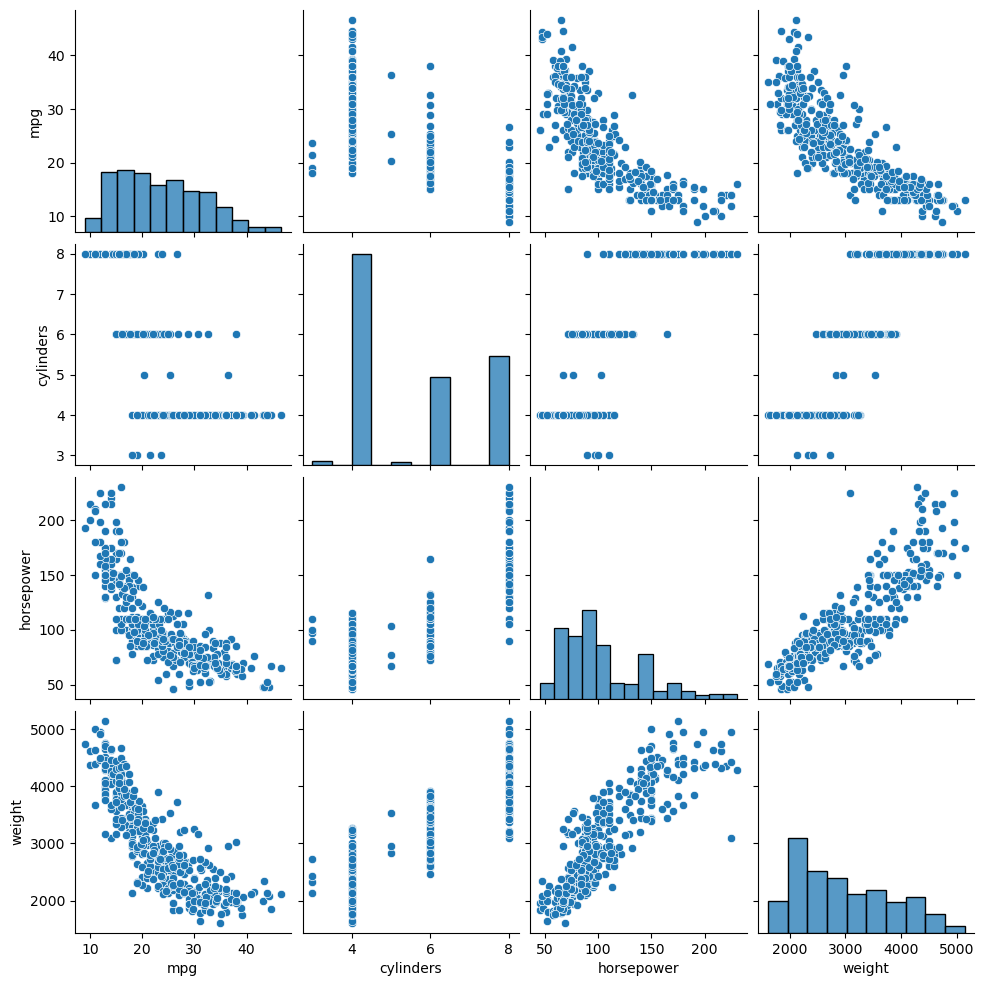

In [8]:
grid_ndf = sns.pairplot(ndf)
plt.show()
plt.close()

In [9]:
X= ndf[['weight']]
y=ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   random_state=10)

print("train data 개수 : ", len(X_train))
print("test data 개수 :", len(X_test))

train data 개수 :  274
test data 개수 : 118


In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

r_square = lr.score(X_test, y_test)
print(r_square)

0.6822458558299325


In [11]:
print('기울기 a:', lr.coef_)
print()

print("y절편 b", lr.intercept_)

기울기 a: [-0.00775343]

y절편 b 46.710366257280086


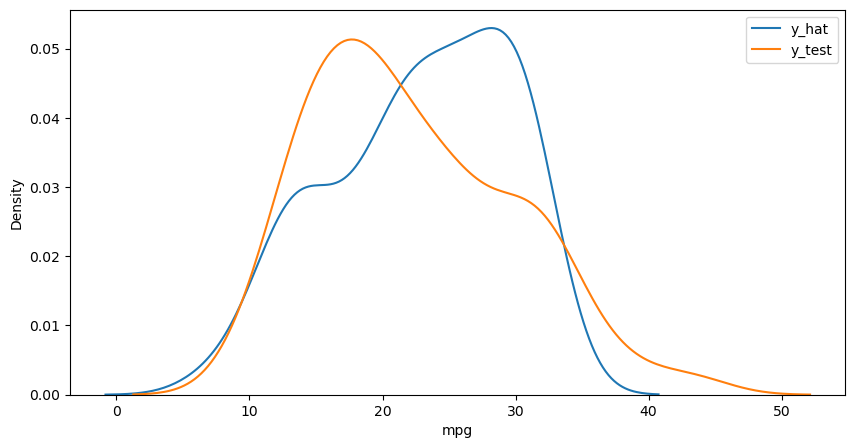

In [12]:
y_hat = lr.predict(X_test)

plt.figure(figsize=(10,5))
ax1= sns.kdeplot(y_hat, label='y_hat')
ax2 = sns.kdeplot(y_test, label='y_test', ax=ax1)
plt.legend()
plt.show()

## 2-2 다항회귀분석

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("auto-mpg.csv", header=None)

df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

df['horsepower'].replace("?", np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower']=df['horsepower'].astype("float")

ndf = df[['mpg','cylinders','horsepower','weight']]

X=ndf[['weight']]
y=ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)

print("훈련 데이터: ", X_train.shape)
print("검증 데이터: ", X_test.shape)

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train) #X_train 데이터를 1차항 데이터에서 2차항 데이터로 변경해준 상태로 학습함.

print("원 데이터: ", X_train.shape)
print("2차항 변환 데이터: ", X_train_poly.shape)

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


In [16]:
pr= LinearRegression()
pr.fit(X_train_poly, y_train)

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test)
print(r_square)

0.7087009262975688


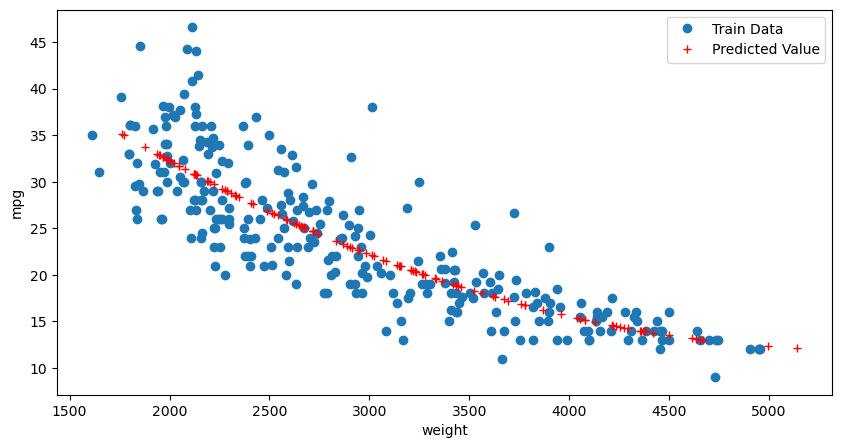

In [18]:
y_hat_test= pr.predict(X_test_poly)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train, y_train, 'o', label='Train Data')
ax.plot(X_test, y_hat_test, 'r+', label = 'Predicted Value')
ax.legend(loc = 'best')
plt.xlabel("weight")
plt.ylabel("mpg")
plt.show()
plt.close()

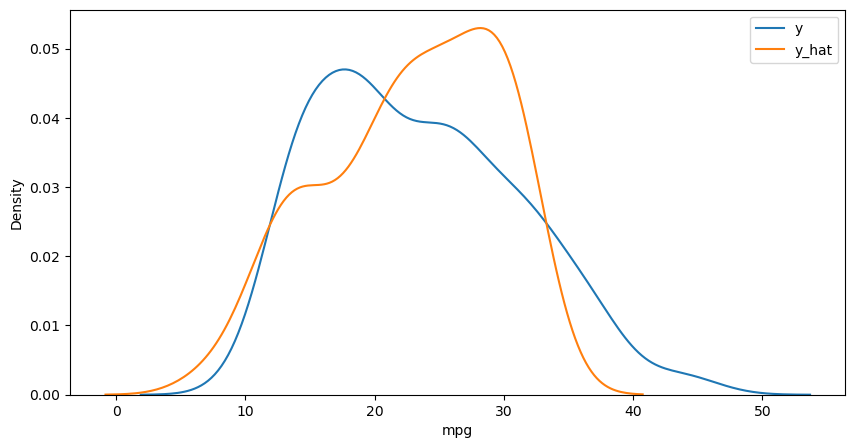

In [20]:
X_poly = poly.fit_transform(X)
y_hay = pr.predict(X_poly)

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y, label='y')
ax2 = sns.kdeplot(y_hat, label = "y_hat", ax=ax1)
plt.legend()
plt.show()

## 2-3 다중회귀분석

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("auto-mpg.csv", header=None)

df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset= ['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype("float")

X=ndf[['cylinders','horsepower','weight']]
y=ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)
print("훈련 데이터 : ", X_train.shape)
print("검증 데이터 : ", X_test.shape )

훈련 데이터 :  (274, 3)
검증 데이터 :  (118, 3)


In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

r_square = lr.score(X_test, y_test)
print(r_square)
print()

print("X 변수의 개수 :", lr.coef_)
print()

print('상수항 b :', lr.intercept_)

0.6939048496695597

X 변수의 개수 : [-0.60691288 -0.03714088 -0.00522268]

상수항 b : 46.41435126963407


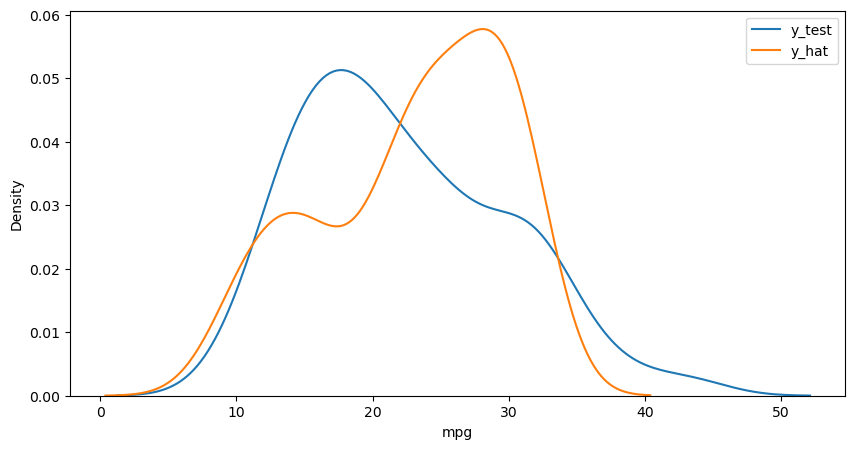

In [25]:
y_hat = lr.predict(X_test)

plt.figure(figsize=(10,5))
ax1= sns.kdeplot(y_test, label='y_test')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

## 3-1 KNN

In [38]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')

display(df.head())
print()

pd.set_option("display.max_columns", 15)
display(df.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [39]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


None

In [40]:
rdf= df.drop(['deck','embark_town'], axis=1)
print(rdf.columns.values)

['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'
 'who' 'adult_male' 'alive' 'alone']


In [41]:
rdf = rdf.dropna(subset=['age'], how='any', axis=0)
print(len(rdf))

714


In [42]:
most_freq= rdf['embarked'].value_counts(dropna=True).idxmax()
print(most_freq)
print()

print(rdf.describe(include='all'))
print()

rdf['embarked'].fillna(most_freq, inplace=True)

S

          survived      pclass   sex         age       sibsp       parch  \
count   714.000000  714.000000   714  714.000000  714.000000  714.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   453         NaN         NaN         NaN   
mean      0.406162    2.236695   NaN   29.699118    0.512605    0.431373   
std       0.491460    0.838250   NaN   14.526497    0.929783    0.853289   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    1.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    2.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    1.000000   
max       1.000000    3.000000   NaN   80.000000    5.000000    6.000000   

              fare embarked  class  who adult_male alive alone  
count   714.000000 

In [43]:
ndf = rdf[['survived','pclass','sex','age','sibsp','parch','embarked']]
display(ndf.head())

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [44]:
onehot_sex = pd.get_dummies(ndf['sex'])
display(onehot_sex)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [45]:
ndf = pd.concat([ndf, onehot_sex], axis=1)
onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
display(onehot_embarked)

,town_C,town_Q,town_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
885,0,1,0
886,0,0,1
887,0,0,1
889,1,0,0


In [46]:
ndf= pd.concat([ndf, onehot_embarked], axis=1)
ndf.drop(['sex','embarked'], axis=1 ,inplace=True)
display(ndf.head())

,survived,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


In [48]:
X=ndf[['pclass','age','sibsp','parch','female','male','town_C','town_Q','town_S']]
y=ndf['survived']

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)

print("train data 개수 :", X_train.shape)
print("test data 개수 :", X_test.shape)

train data 개수 : (499, 9)
test data 개수 : (215, 9)


In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_hat = knn.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 1 1 1 0 0]
[0 0 1 0 0 1 1 1 0 0]


C:\Users\cksgh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### 모형 성능 평가

In [51]:
from sklearn import metrics

knn_matrix = metrics.confusion_matrix(y_test, y_hat)
print(knn_matrix)

[[110  15]
 [ 26  64]]


In [52]:
knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       125
           1       0.81      0.71      0.76        90

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215



## 3-2 SVM

In [53]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')

pd.set_option('display.max_columns', 15)

rdf = df.drop(['deck','embark_town'], axis=1)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)

most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
rdf['embarked'].fillna(most_freq, inplace=True)

ndf = rdf[['survived','pclass','sex','age','sibsp','parch','embarked']]

onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf,onehot_sex], axis=1)

onehot_embarked  = pd.get_dummies(ndf['embarked'], prefix='town')

ndf= pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex','embarked'], axis=1 ,inplace=True)

X= ndf[['pclass','age','sibsp','parch','female','male','town_C','town_Q','town_S']]
y= ndf['survived']

from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

print("train data 개수 :", X_train.shape)
print("test data 개수 :", X_test.shape)

train data 개수 : (499, 9)
test data 개수 : (215, 9)


In [55]:
from sklearn import svm

svm_model = svm.SVC(kernel='rbf')

svm_model.fit(X_train, y_train)

y_hat = svm_model.predict(X_test)
print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [56]:
from sklearn import metrics

svm_matrix = metrics.confusion_matrix(y_test, y_hat)
print(svm_matrix)
print()

svm_report = metrics.classification_report(y_test, y_hat)
print(svm_report)

[[120   5]
 [ 35  55]]

              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



## 3-3 Decision Tree

In [60]:
import pandas as pd
import numpy as np

uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df=pd.read_csv(uci_path, header=None)

df.columns = ['id','clump','cell_size','cell_shape','adhesion','epithlial','bare_nuclei','chromatin','normal_nucleoli','mitoses','class']

pd.set_option('display.max_columns', 15)

display(df.head())
print()

print(df.info())
print()

print(df.describe())



,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clump            699 non-null    int64 
 2   cell_size        699 non-null    int64 
 3   cell_shape       699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   epithlial        699 non-null    int64 
 6   bare_nuclei      699 non-null    object
 7   chromatin        699 non-null    int64 
 8   normal_nucleoli  699 non-null    int64 
 9   mitoses          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None

                 id       clump   cell_size  cell_shape    adhesion  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.0

In [62]:
print(df['bare_nuclei'].unique())
print()

df['bare_nuclei'].replace('?', np.nan, inplace=True)
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True)
df['bare_nuclei'] = df['bare_nuclei'].astype('int')

print(df.describe())

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']

                 id       clump   cell_size  cell_shape    adhesion  \
count  6.830000e+02  683.000000  683.000000  683.000000  683.000000   
mean   1.076720e+06    4.442167    3.150805    3.215227    2.830161   
std    6.206440e+05    2.820761    3.065145    2.988581    2.864562   
min    6.337500e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.776170e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171795e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238705e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

        epithlial  bare_nuclei   chromatin  normal_nucleoli     mitoses  \
count  683.000000   683.000000  683.000000       683.000000  683.000000   
mean     3.234261     3.544656    3.445095         2.869693    1.603221   
std      2.223085     3.643857    2.449697         3.052666    1.732674   
min      1.0

In [63]:
X= df[['clump','cell_size','cell_shape','adhesion','epithlial','bare_nuclei','chromatin','normal_nucleoli','mitoses']]
y=df['class']

from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=10)

print("train data 개수 : ", X_train.shape)
print("test data 개수 :", X_test.shape)


train data 개수 :  (478, 9)
test data 개수 : (205, 9)


In [65]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

tree_model.fit(X_train, y_train)

y_hat = tree_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[4 4 4 4 4 4 2 2 4 4]
[4 4 4 4 4 4 2 2 4 4]


In [66]:
from sklearn import metrics

tree_matrix = metrics.confusion_matrix(y_test, y_hat)

print(tree_matrix)
print()

tree_report = metrics.classification_report(y_test, y_hat)
print(tree_report)

[[127   4]
 [  2  72]]

              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205

